In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [3]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

def fast_plot(data, ax):
    ax.plot(data.transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$");
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

def flatten_property(peaks, property):
    flat = []
    for i in range(0, len(peaks['properties'])):
        flat.extend(peaks['properties'][i][property])
    return np.array(flat)

In [4]:
data_folder = '/Users/emiliebertholet/cernbox/coldbox_data'
peak_folder = 'data_tests'

In [6]:
filename = f'{data_folder}/adc_data_run_25036_ch_40_all.npy' # neutrons
data = np.load(filename, allow_pickle=True).astype(np.int16)
data = np.apply_along_axis(substract_peds, axis=1, arr=data)

with open(f'{peak_folder}/peaks_neutrons_wlenNone.pkl', 'rb') as file:
    wlenNone_prom200 = pickle.load(file)
with open(f'{peak_folder}/peaks_neutrons_wlenNone_prom500.pkl', 'rb') as file:
    wlenNone_prom500 = pickle.load(file)
with open(f'{peak_folder}/peaks_neutrons_wlen500.pkl', 'rb') as file:
    wlen500_prom200 = pickle.load(file)
with open(f'{peak_folder}/peaks_neutrons_wlen500_prom500.pkl', 'rb') as file:
    wlen500_prom500 = pickle.load(file)

print('PNS')
print(data.shape)
print('peaks_neutrons_wlenNone', len(wlenNone_prom200['flat_peak_indices']))
print('peaks_neutrons_wlenNone_prom500', len(wlenNone_prom500['flat_peak_indices']))
print('peaks_neutrons_wlen500', len(wlen500_prom200['flat_peak_indices']))
print('peaks_neutrons_wlen500_prom500', len(wlen500_prom500['flat_peak_indices']))
print(wlenNone_prom200.keys())


PNS
(16600, 65536)
peaks_neutrons_wlenNone 150242
peaks_neutrons_wlenNone_prom500 49548
peaks_neutrons_wlen500 142716
peaks_neutrons_wlen500_prom500 47676
dict_keys(['mask', 'row_peak_indices', 'peak_heights', 'properties', 'flat_peak_indices'])


In [7]:
prop_dict  = {
    'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}


## Plot waveforms

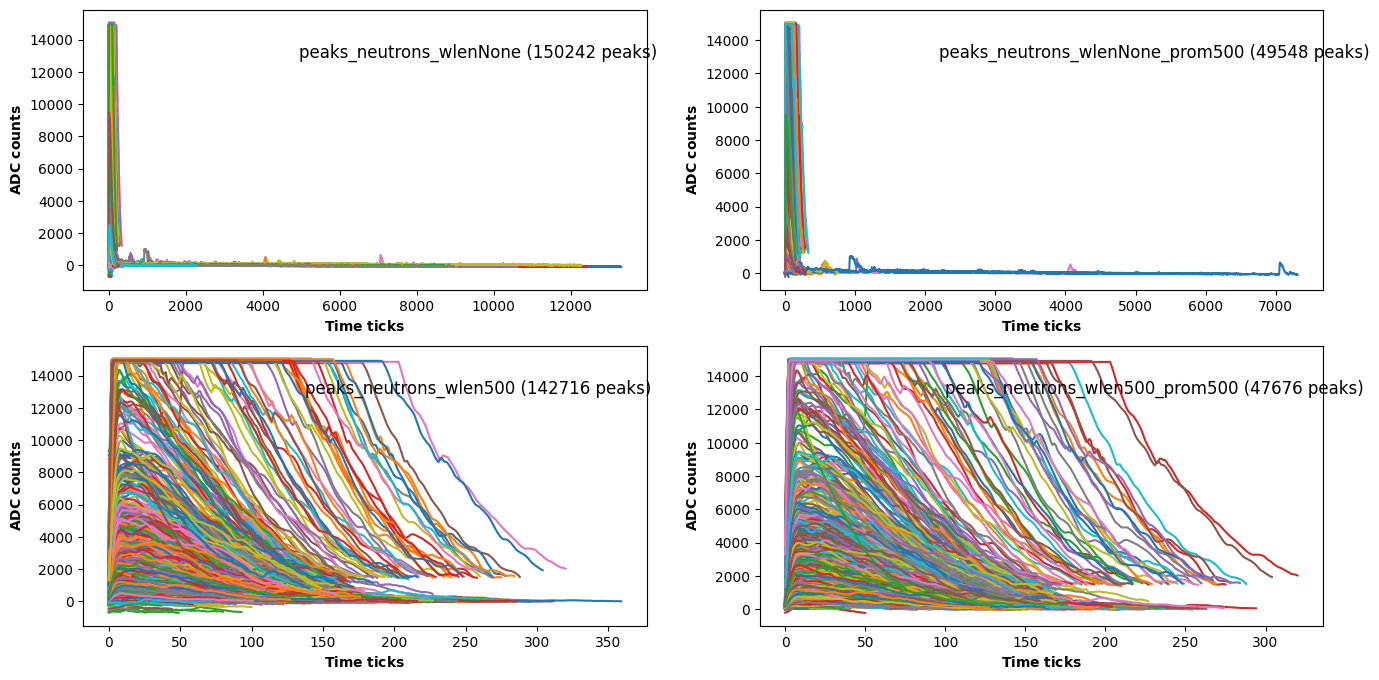

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

nTrigers = 500

j=0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    for trigger_idx in range(0, nTrigers):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            if properties[trigger_idx]['plateau_sizes'][i] > 0:
                l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1




### remove saturated waveforms

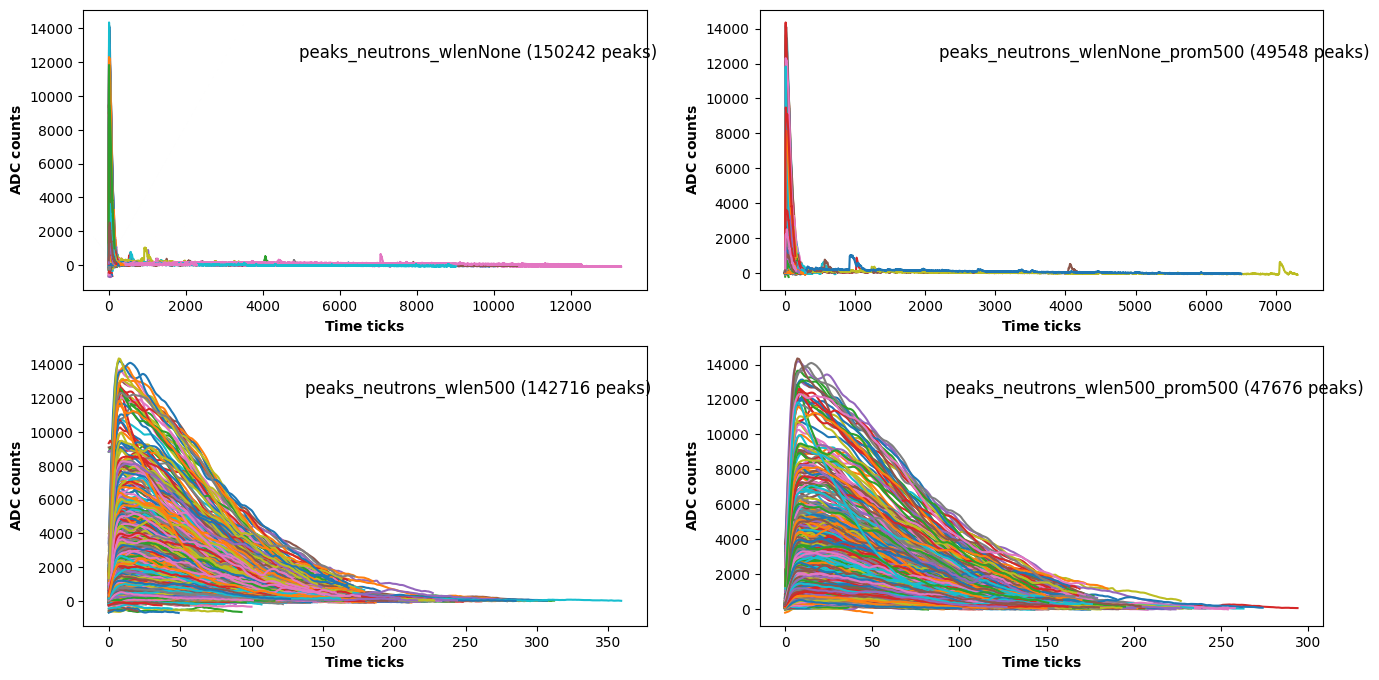

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    for trigger_idx in range(0, 500):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            if properties[trigger_idx]['plateau_sizes'][i]==1:
                l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1




### scan for outliers

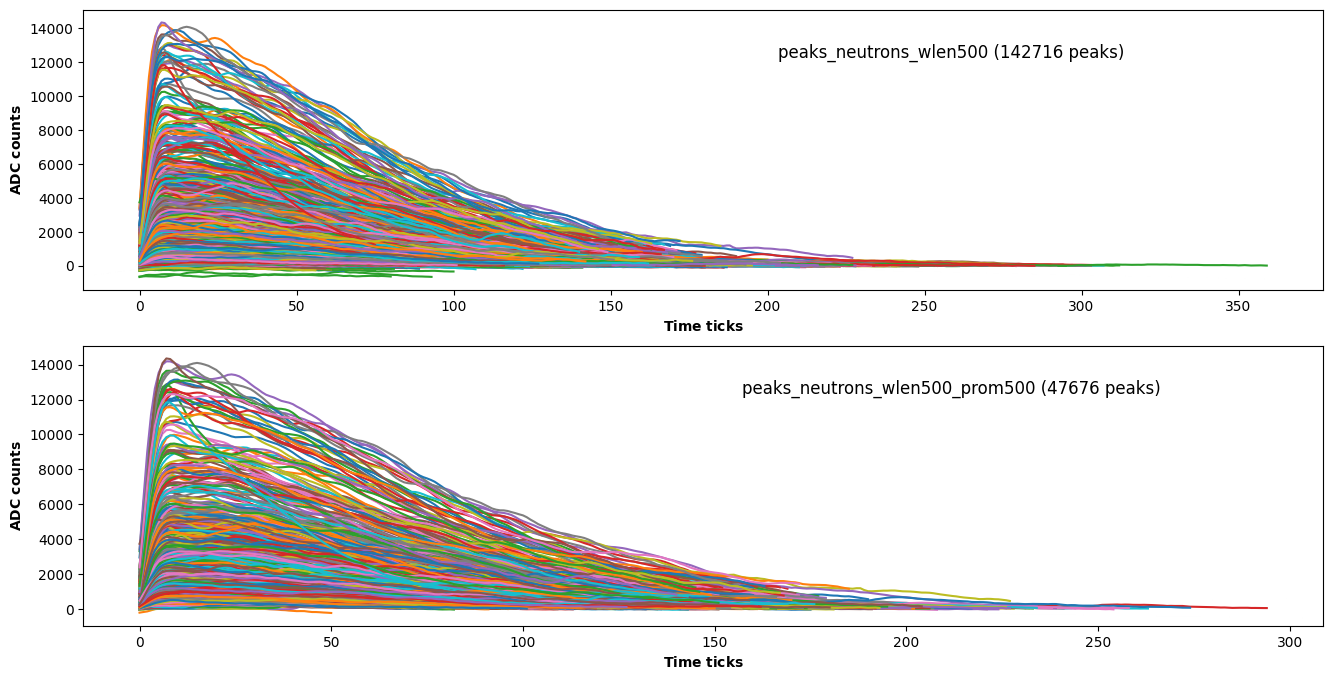

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}

j=0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    for trigger_idx in range(0, 500):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            if properties[trigger_idx]['plateau_sizes'][i]==1:
                    if properties[trigger_idx]['widths'][i]>50:
                        l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                        r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                        ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1

### cleanest for now

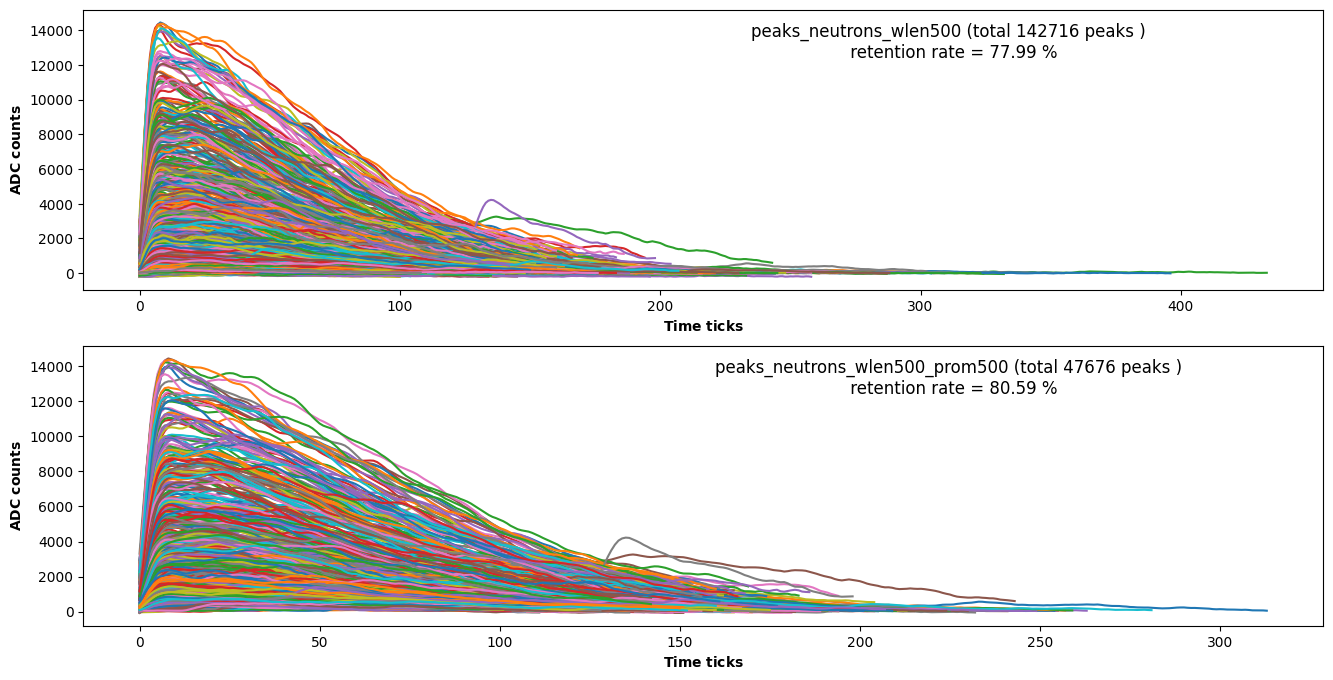

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}

j=0
count, sel = 0, 0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    # for trigger_idx in range(0, 500):
    for trigger_idx in range(500, 1000):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            count+=1
            if (properties[trigger_idx]['plateau_sizes'][i]==1) and (properties[trigger_idx]['widths'][i]>100):
                        sel+=1
                        l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                        r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                        ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    u = prop_dict[prop][0]['flat_peak_indices']
    ax.set_title(f"{prop_dict[prop][1]} (total {len(u)} peaks ) \n retention rate = {sel*100/count:.2f} %", y=0.8, x = 0.7);
    j+=1


In [12]:
properties[0].keys()

dict_keys(['plateau_sizes', 'left_edges', 'right_edges', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])

# Peak Heights

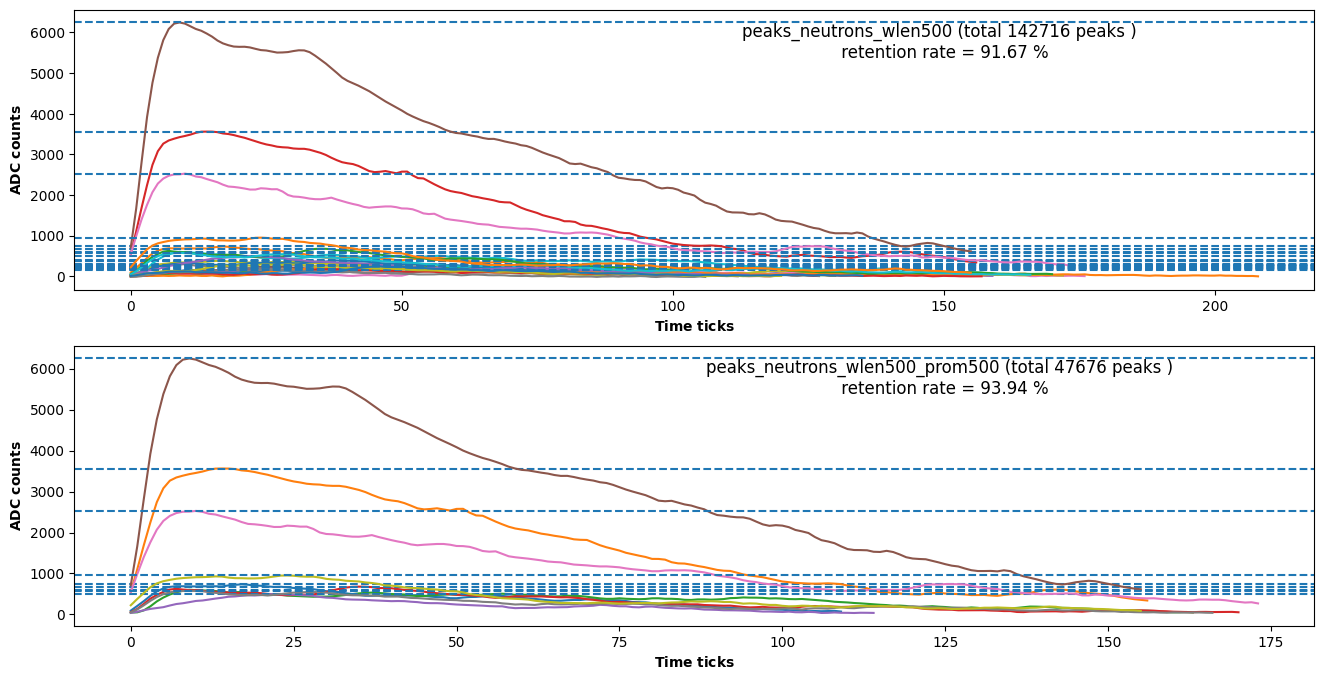

In [ ]:
## make sure we get what we expect

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}

j=0
count, sel = 0, 0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    heights = prop_dict[prop][0]['peak_heights']
    # for trigger_idx in range(0, 500):
    for trigger_idx in range(0, 1):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            count+=1
            if (properties[trigger_idx]['plateau_sizes'][i]==1) and (properties[trigger_idx]['widths'][i]>100):
                        sel+=1
                        l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                        r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                        ax.plot(data[trigger_idx][l:r].transpose())
                        ax.axhline(y = heights[trigger_idx][i], linestyle='--')
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    u = prop_dict[prop][0]['flat_peak_indices']
    ax.set_title(f"{prop_dict[prop][1]} (total {len(u)} peaks ) \n retention rate = {sel*100/count:.2f} %", y=0.8, x = 0.7);
    j+=1


- histo of the peak heights
- histo of the peak positions

### Peak Heights

C
D


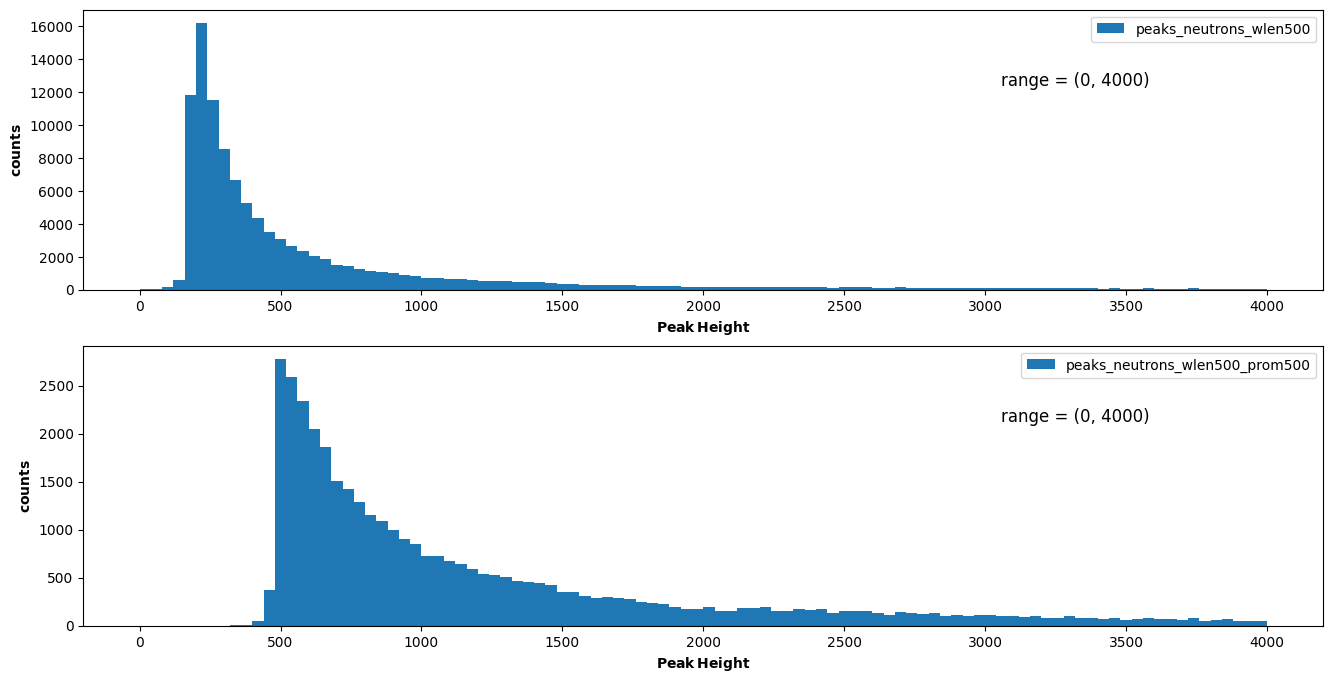

In [76]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}
# rg = None
rg = (0, 4000) #None

j=0
count, sel = 0, 0
for prop in prop_dict:
    print(prop)
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    heights = prop_dict[prop][0]['peak_heights']

    heights_hist = []
    for trigger_idx in range(0, len(heights)):
    # for trigger_idx in range(0, 500):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            if (properties[trigger_idx]['plateau_sizes'][i]==1) and (properties[trigger_idx]['widths'][i]>100):
                heights_hist.append(heights[trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = prop_dict[prop][1], range=rg)
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Height}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"range = {rg}", x = 0.8, y = 0.7);
    ax.legend()
    j+=1

   


### Peak Positions

C
D


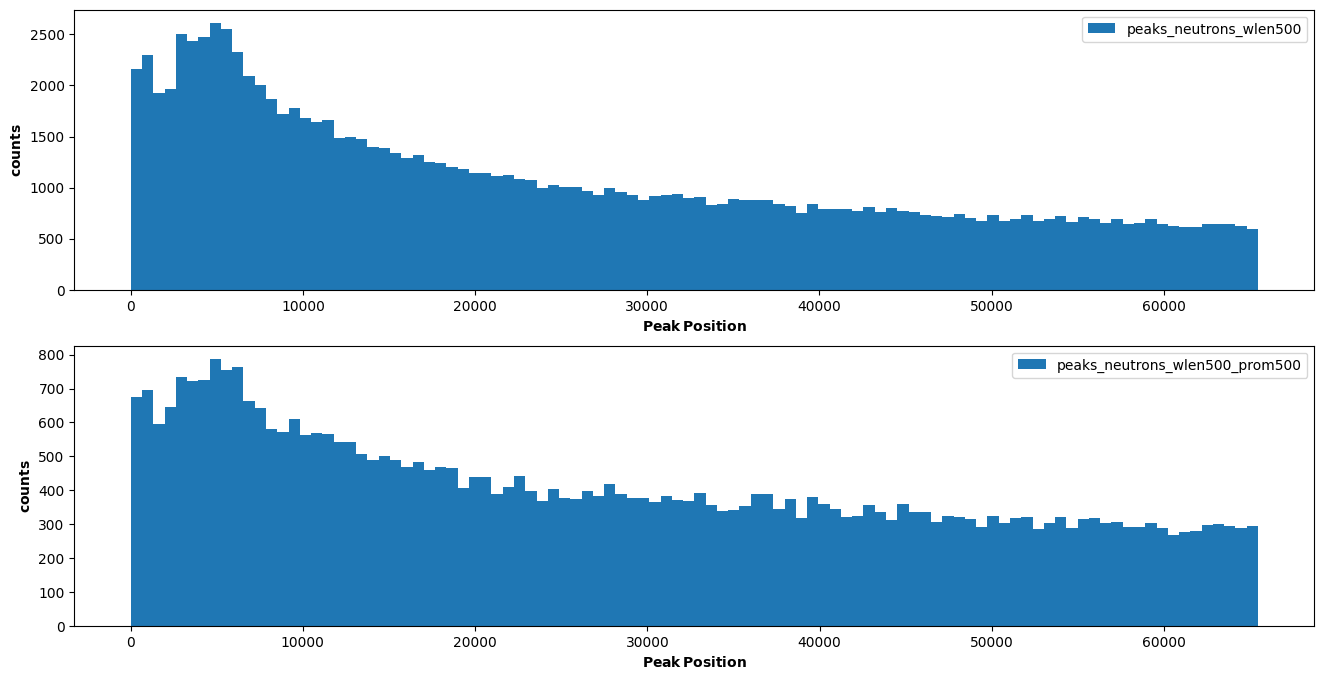

In [78]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}
rg = None
# rg = (0, 4000) #None

j=0
count, sel = 0, 0
for prop in prop_dict:
    print(prop)
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    positions = prop_dict[prop][0]['row_peak_indices']

    positions_hist = []
    for trigger_idx in range(0, len(positions)):
    # for trigger_idx in range(0, 500):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            if (properties[trigger_idx]['plateau_sizes'][i]==1) and (properties[trigger_idx]['widths'][i]>100):
                positions_hist.append(positions[trigger_idx][i])
    ax.hist(positions_hist, bins=100, label = prop_dict[prop][1], range=rg)
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Position}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"range = {rg}", x = 0.8, y = 0.7);
    ax.legend()
    j+=1

   
